In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define column names
columns = ['ID', 'Artifact', 'label', 'tweet']

In [4]:
data = pd.read_csv('artifacts/twitter_training.csv',names=columns)

In [5]:
data.head(10)

,ID,Artifact,label,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


## Data Preprocessing

In [6]:
data.shape

(74682, 4)

#### Ensure No Values Duplicated

In [7]:
data.duplicated().sum()

2700

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

#### Ensure No Null Values Included

In [10]:
data.isnull().sum()

ID            0
Artifact      0
label         0
tweet       326
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

ID          0
Artifact    0
label       0
tweet       0
dtype: int64

### Text Preprocessing

In [13]:
import re
import string

In [14]:
data["tweet"].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tweet, dtype: object

#### Convert Uppercase to Lowercase

In [15]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
data["tweet"].head(10)

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    so i spent a few hours making something for fu...
7    so i spent a couple of hours doing something f...
8    so i spent a few hours doing something for fun...
9    so i spent a few hours making something for fu...
Name: tweet, dtype: object

#### Remove Links

In [17]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [18]:
data["tweet"].tail(10)

74672    let no elite go unnoticed... nvidia highlights...
74673    let no elim go unnoticed.... nvidia highlights...
74674    let a no information elim that go unnoticed......
74675    <unk> my elim be no.... nvidia highlights pict...
74676    just realized the windows partition of my mac ...
74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: tweet, dtype: object

#### Remove Punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [21]:
data["tweet"].tail(10)

74672    let no elite go unnoticed nvidia highlights au...
74673    let no elim go unnoticed nvidia highlights aut...
74674    let a no information elim that go unnoticed nv...
74675    unk my elim be no nvidia highlights pictures r...
74676    just realized the windows partition of my mac ...
74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: tweet, dtype: object

#### Remove numbers

In [22]:
data["tweet"].head(5)

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: tweet, dtype: object

In [23]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [24]:
data["tweet"].head(5)

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands  and i will murder y...
Name: tweet, dtype: object

#### Remove Stopwords

In [25]:
import nltk

In [34]:
nltk.download('stopwords', download_dir='static')

[nltk_data] Downloading package stopwords to static...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
with open('static/corpora/stopwords/english', 'r') as stopwords_file:
    sw = stopwords_file.read().splitlines()

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [29]:
data["tweet"].head(10)

0                        im getting borderlands murder
1                                  coming borders kill
2                          im getting borderlands kill
3                         im coming borderlands murder
4                        im getting borderlands murder
5                        im getting borderlands murder
6    spent hours making something fun dont know hug...
7    spent couple hours something fun dont know im ...
8    spent hours something fun dont know im huge bo...
9    spent hours making something fun dont know hug...
Name: tweet, dtype: object

#### Stemming

In [30]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [31]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [33]:
data["tweet"].tail()

74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: tweet, dtype: object

In [135]:
data

,ID,Artifact,label,tweet
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland murder
...,...,...,...,...
74677,9200,Nvidia,Positive,realiz window partit mac like year behind nvid...
74678,9200,Nvidia,Positive,realiz mac window partit year behind nvidia dr...
74679,9200,Nvidia,Positive,realiz window partit mac year behind nvidia dr...
74680,9200,Nvidia,Positive,realiz window partit mac like year behind nvid...


## Feature Engineering

In [137]:
data['label'].value_counts()

label
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [138]:
data['label']= data['label'].replace('Irrelevant','Neutral')

In [139]:
data['label'].value_counts()

label
Neutral     30245
Negative    21698
Positive    19713
Name: count, dtype: int64

In [140]:
data['label']= data['label'].replace('Negative',-1)
data['label']= data['label'].replace('Positive',1)
data['label']= data['label'].replace('Neutral',0)

In [142]:
data['label'].value_counts()

label
 0    30245
-1    21698
 1    19713
Name: count, dtype: int64

## Building Vacabulary

In [143]:
from collections import Counter
wordlist = Counter()

In [144]:
wordlist

Counter()

In [145]:
for sentence in data['tweet']:
    wordlist.update(sentence.split())

In [146]:
len(wordlist)

32380

In [147]:
data.shape

(71656, 4)

In [148]:
tokens = []
for key in wordlist:
    if wordlist[key] > 10:
        tokens.append(key)

In [149]:
len(tokens)

5491

In [150]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'static/vocabulary.txt')

## Divide Dataset

In [151]:
X = data['tweet']
y = data['label']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
X_train.shape

(57324,)

In [154]:
X_test.shape

(14332,)

## Vectorization

In [155]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [156]:
vectorized_x_train = vectorizer(X_train, tokens)

In [157]:
vectorized_x_test = vectorizer(X_test, tokens)

In [158]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [159]:
y_train

64296   -1
22772    0
3670     1
2193     0
26940    1
        ..
33457   -1
32189    0
67042    1
41799    0
16877    0
Name: label, Length: 57324, dtype: int64

In [160]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [161]:
y_train.value_counts()

label
 0    24152
-1    17389
 1    15783
Name: count, dtype: int64

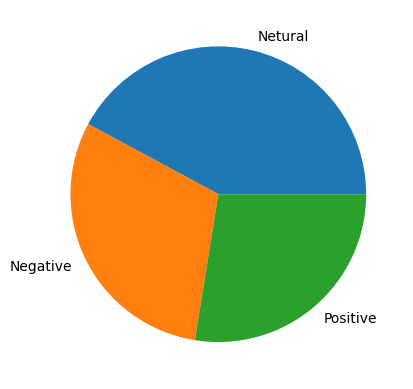

In [164]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[-1],y_train.value_counts()[1]]), labels=['Netural', 'Negative','Positive'])
plt.show()

## Model Training and Evaluation

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix, classification_report

# Function to get training Scores   
def training_scores(y_act, y_pred):
    print("\n ======= Training Classification Report ==========")
    acc = round(accuracy_score(y_act, y_pred), 3)
    print(classification_report(y_act,y_pred))
    cm = confusion_matrix(y_act, y_pred)
    print("Training Accuracy: ",acc)
    
# Function to get validation Scores    
def validation_scores(y_act, y_pred):
    print("\n ======= Testing Classification Report ==========")
    acc = round(accuracy_score(y_act, y_pred), 3)
    print(classification_report(y_act,y_pred))
    cm = confusion_matrix(y_act, y_pred)
    print("Testing Accuracy: ",acc)

         

    # Plot Confusion Matrix
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('\nConfusion Matrix')
    plt.show()

### Logistic Regression

In [178]:
lr = LogisticRegression()
lr.fit(vectorized_x_train, y_train)

LogisticRegression()

In [179]:
y_train_pred = lr.predict(vectorized_x_train)
y_test_pred=lr.predict(vectorized_x_test)


 ======= Training Classification Report ==========
              precision    recall  f1-score   support

          -1       0.83      0.80      0.81     17389
           0       0.78      0.84      0.81     24152
           1       0.80      0.75      0.77     15783

    accuracy                           0.80     57324
   macro avg       0.80      0.80      0.80     57324
weighted avg       0.80      0.80      0.80     57324

Training Accuracy:  0.802

 ======= Testing Classification Report ==========
              precision    recall  f1-score   support

          -1       0.77      0.75      0.76      4309
           0       0.73      0.78      0.75      6093
           1       0.72      0.68      0.70      3930

    accuracy                           0.74     14332
   macro avg       0.74      0.73      0.74     14332
weighted avg       0.74      0.74      0.74     14332

Testing Accuracy:  0.741


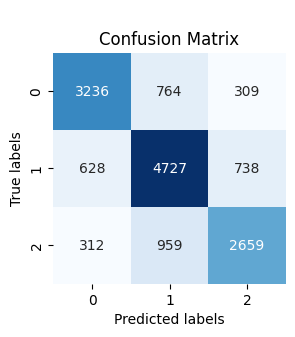

In [180]:
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)

### Naive Bayes

In [181]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train, y_train)

MultinomialNB()

In [182]:
y_train_pred = mnb.predict(vectorized_x_train)
y_test_pred = mnb.predict(vectorized_x_test)


 ======= Training Classification Report ==========
              precision    recall  f1-score   support

          -1       0.72      0.73      0.72     17389
           0       0.73      0.70      0.71     24152
           1       0.66      0.70      0.68     15783

    accuracy                           0.71     57324
   macro avg       0.70      0.71      0.71     57324
weighted avg       0.71      0.71      0.71     57324

Training Accuracy:  0.707

 ======= Testing Classification Report ==========
              precision    recall  f1-score   support

          -1       0.69      0.71      0.70      4309
           0       0.70      0.66      0.68      6093
           1       0.63      0.67      0.65      3930

    accuracy                           0.68     14332
   macro avg       0.68      0.68      0.68     14332
weighted avg       0.68      0.68      0.68     14332

Testing Accuracy:  0.679


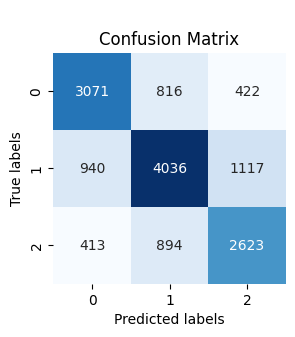

In [183]:
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)

### Decision Tree

In [184]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train, y_train)

DecisionTreeClassifier()

In [185]:
y_train_pred = dt.predict(vectorized_x_train)
y_test_pred = dt.predict(vectorized_x_test)


 ======= Training Classification Report ==========
              precision    recall  f1-score   support

          -1       0.99      0.96      0.98     17389
           0       0.95      0.99      0.97     24152
           1       0.99      0.95      0.97     15783

    accuracy                           0.97     57324
   macro avg       0.98      0.97      0.97     57324
weighted avg       0.97      0.97      0.97     57324

Training Accuracy:  0.972

 ======= Testing Classification Report ==========
              precision    recall  f1-score   support

          -1       0.83      0.81      0.82      4309
           0       0.82      0.84      0.83      6093
           1       0.80      0.79      0.79      3930

    accuracy                           0.82     14332
   macro avg       0.82      0.81      0.82     14332
weighted avg       0.82      0.82      0.82     14332

Testing Accuracy:  0.818


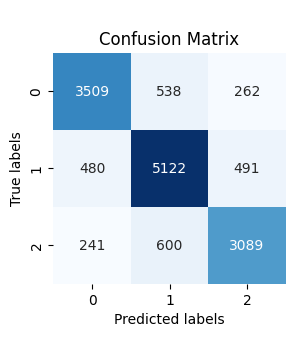

In [186]:
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)

## Save Model

In [187]:
import pickle

with open('static/model.pickle', 'wb') as file:
    pickle.dump(lr, file)